#Assignment 1: Submit a write-up on the following:

- Hugging face agents

- Hugging face pipeline for text generation

- HF inference endpoints

- Give feedback on the image generation and explore different models available on the Hugging Face website



#Assignment 2: Using OpenAI's CLIP Model for Image Captioning and Building an Image Search Engine

#Objective

##In this assignment, you will use OpenAI's CLIP (Contrastive Language-Image Pre-training) model to:
- Generate captions for 15 different images.
- Build a search engine for these images using a larger dataset of images.


##Part 1: Generate Captions for Images

##Part 2: Build an Image Search Engine


##Submission
Submit the following as a **Streamlit** app:

- Your Python code for generating captions and building the search engine.
- A report describing your approach, challenges faced, and how you overcame them.
- Screenshots of the interface and results.

Evaluation Criteria

- Correctness and efficiency of the code.
- Clarity and completeness of the report.
- Usability and functionality of the search engine interface.

#Please don't use any Generative AI Models

# Assignment 1:


1. **Hugging face agents:**


Hugging Face Agents are designed  for integrating multiple NLP models. They allow  to build complex applications by  combining together different models  in a modular fashion.

There are two types of agents:

CodeAgent acts in one shot, generating code to solve the task, then executes it at once.

ReactAgent acts step by step, each step consisting of one thought, then one tool call and execution. It has two classes:
 ReactJsonAgent writes its tool calls in JSON.
 ReactCodeAgent writes its tool calls in Python code.


2.   **Hugging face pipeline for text generation:**

Text generation is essential for  NLP tasks, such as translation, text generation, summarization, and more. So it will simplify the process of generating text using pre-trained models by providing an easy pipline to load a model ,process text, etc.

you can use a Default text generation configuration or Customize text generation that includes step-by-step:


    1.   Installing the Transformers Library
    2.   Loading the Pipeline
    3.   Generating Text by by providing an input prompt










3.   **HF inference endpoints:**

It provides powerful solution with effortlessly deploy Transformers, Diffusers, or any model in a few simple steps on  fully managed infrastructure. Minimize costs with  a secure, and  compliant way.


4. **Give feedback on the image generation and explore different models available on the Hugging Face website** ارجعي له


Image generation technology has made impressive results with offering capabilities that produce high-quality visuals from textual descriptions.



# Assignment 2:

**PART1:**

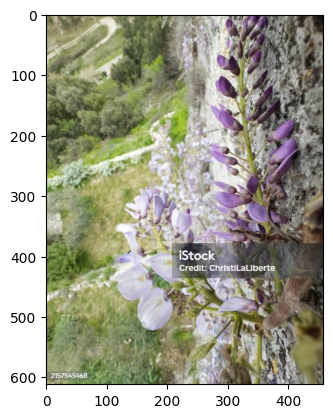

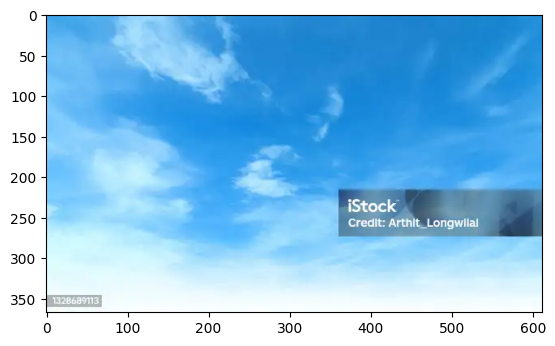

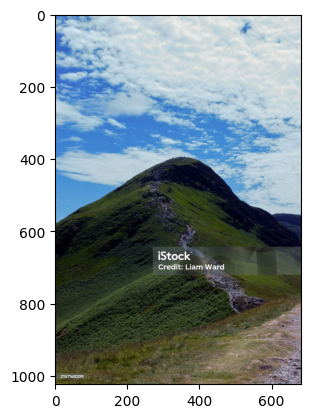

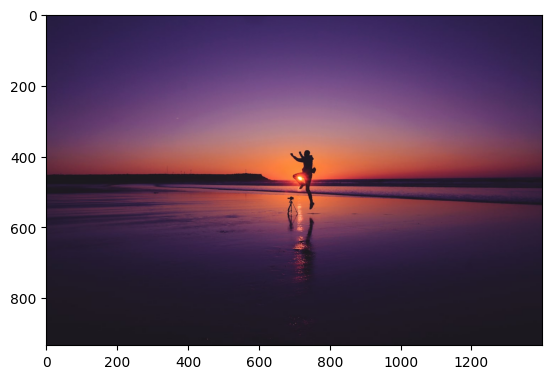

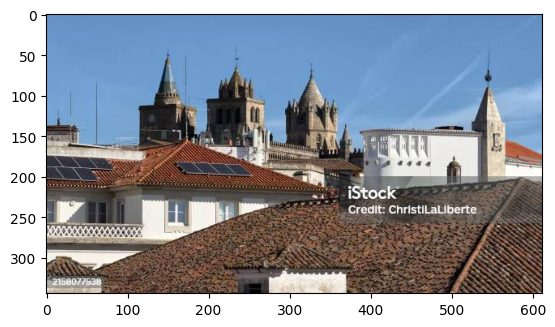

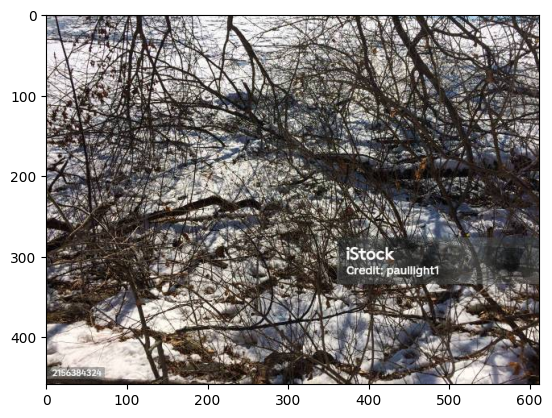

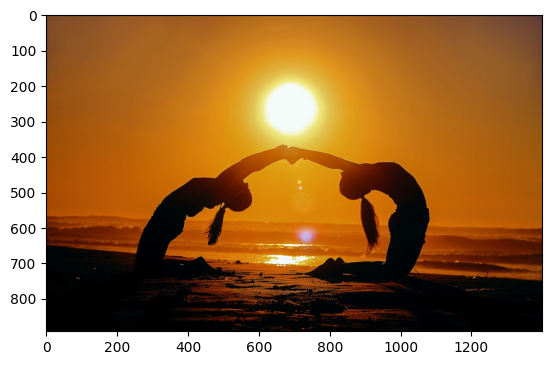

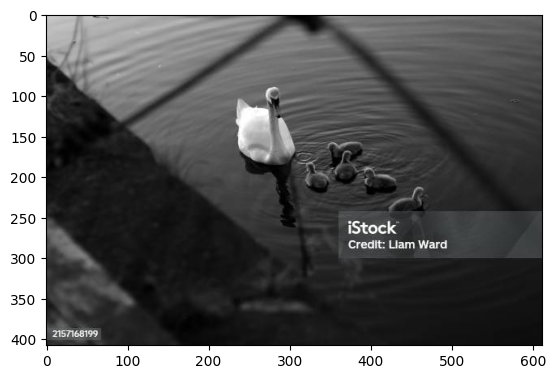

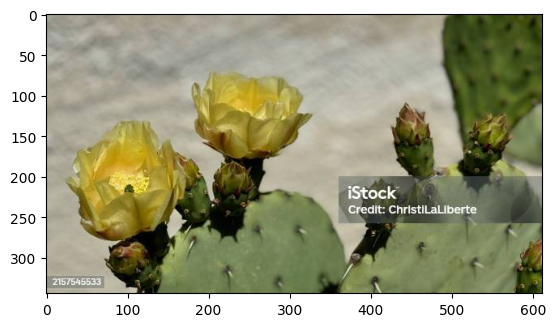

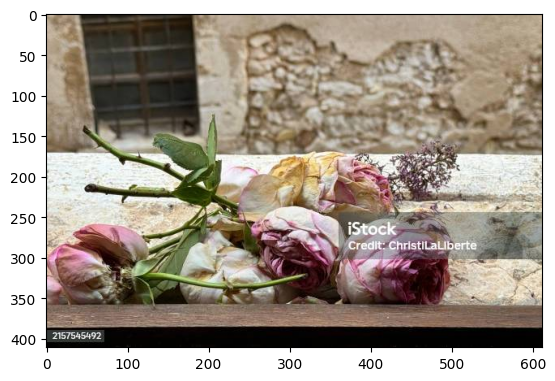

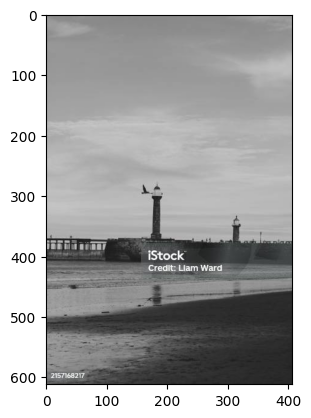

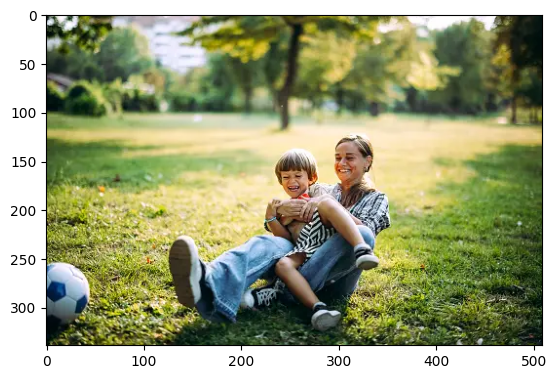

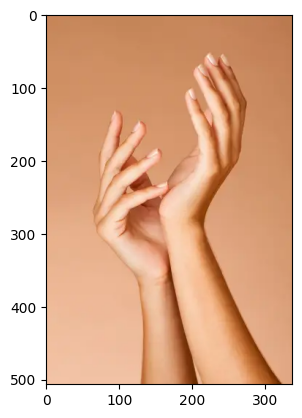

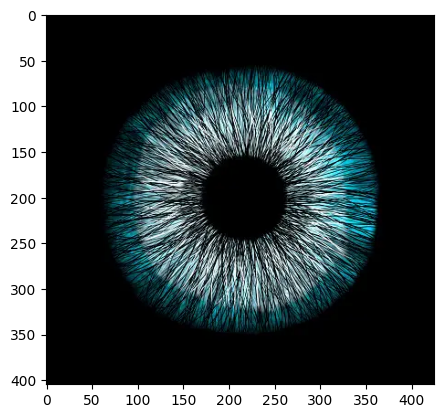

In [31]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests

urls = [
    "https://media.istockphoto.com/id/2157545468/photo/img_5465-wisteria-on-a-tall-stone-wall.jpg?s=612x612&w=is&k=20&c=YwoZTMQcj_b1lmX0betWySk4LwOWvp9N58VFVq-7qfY=",
    "https://media.istockphoto.com/id/1328689113/photo/summer-blue-sky-and-white-cloud-white-background-beautiful-clear-cloudy-in-sunlight-calm.webp?s=612x612&w=is&k=20&c=3SBN5WSJ6p_CsAn-j26AegXjzHQZIfXDAWai7iIrNLI=",
    "https://media.istockphoto.com/id/2157168209/photo/img_0925.jpg?s=1024x1024&w=is&k=20&c=k1Q9mpj6diBrAq74_FkGPhSUY87ndJfjMlHN6Q1bVXA=",
    "https://images.unsplash.com/photo-1622977265115-cce36eb43f18?w=1400&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8M3x8aW1nfGVufDB8fDB8fHww",
    "https://images.unsplash.com/photo-1520209759809-a9bcb6cb3241?w=1400&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTF8fGltZ3xlbnwwfHwwfHx8MA%3D%3D",
    "https://media.istockphoto.com/id/2158077538/photo/img_2946-evora-rooftops.jpg?s=612x612&w=is&k=20&c=WZD3TI25PfTFkTOW5VgDHqFJtacPGjdRkIakw2ngcNY=",
    "https://media.istockphoto.com/id/2156384324/photo/img_1363-branches-on-pond-with-ice-and-snow-during-new-england-winter-2022-paul-light.jpg?s=612x612&w=is&k=20&c=n5gYQ5fhBtfBYXJOOl4WNT_pcKIcTBRuXXjlsSIBpHA=",
    "https://images.unsplash.com/photo-1508919801845-fc2ae1bc2a28?w=1400&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTl8fGltZ3xlbnwwfHwwfHx8MA%3D%3D",
    "https://media.istockphoto.com/id/2157168199/photo/img_9344.jpg?s=612x612&w=is&k=20&c=gSQUowAlJEhCvZ7egZ-GKeyQlK_4v09RanA16KJa9Xc=",
    "https://media.istockphoto.com/id/2157545533/photo/img_6878-cactus-in-bloom.jpg?s=612x612&w=is&k=20&c=RZiVJ8xqk9n2SeKsMzEoVUsb51sNlJH9e4OaMbEOrIE=",
    "https://media.istockphoto.com/id/2157545492/photo/img_6538-wilting-roses-on-a-window-ledge.jpg?s=612x612&w=is&k=20&c=y61_QoqWkBCI4TcCgX8mRxxaRokvMBG719JJQJN81wk=",
    "https://media.istockphoto.com/id/2157168217/photo/img_1207.jpg?s=612x612&w=is&k=20&c=GhmEIMFB065qRQD_tTZ06AZa6M-BzwahcBGvRGEmIoA=",
    "https://media.istockphoto.com/id/1674215259/photo/playing-with-mother.webp?b=1&s=170667a&w=0&k=20&c=AvWOerEqLE_wdygSvfPb0wuaiH0V-geJ1Jplp0h3xas=",
    "https://media.istockphoto.com/id/118281225/photo/manicured-nails-woman-hands.webp?b=1&s=170667a&w=0&k=20&c=zI1gRMZeRekc2lTYBXIzXZtid05uF_6DBP0AtJGPrJU=",
    "https://media.istockphoto.com/id/1871073219/photo/big-eye.webp?b=1&s=170667a&w=0&k=20&c=fjIQMTsELLqWj62ViQuyk1iANgfaPBtpYyXgFMqmFLU="
    ]

images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]




# to make sure it's openning
for image in images:
    plt.show(plt.imshow(np.asarray(image)))

In [32]:
from transformers import CLIPProcessor, CLIPModel,BlipProcessor, BlipForConditionalGeneration

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')


#BLIP to generate captions

model_name = 'Salesforce/blip-image-captioning-base'
processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)


generated_captions = []
for image in images:
    inputs = processor(images=image, return_tensors="pt")
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    generated_captions.append(caption)



/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Caption: a purple flower growing on a rock


Caption: a blue sky with clouds and a white cloud


Caption: a mountain with a trail going through it


Caption: a field of green grass with a blur of the sun


Caption: a person standing on a beach at sunset


Caption: the roof of a building with a church in the background


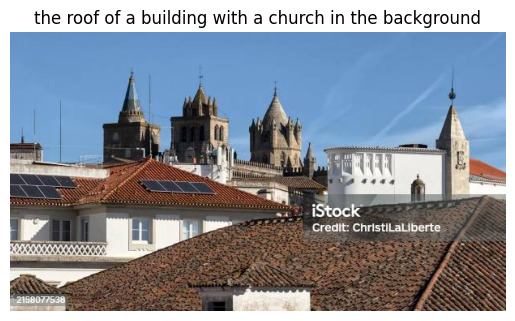

Caption: a small patch of snow in the middle of the woods


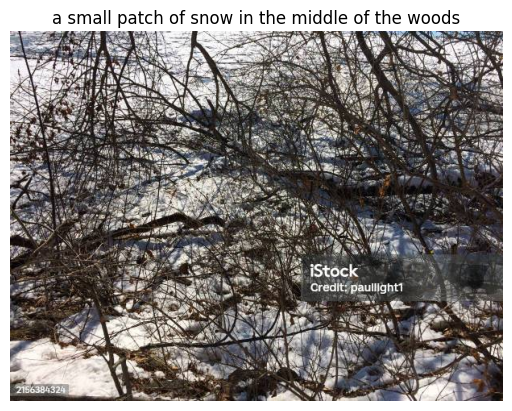

Caption: two people doing yoga on the beach at sunset


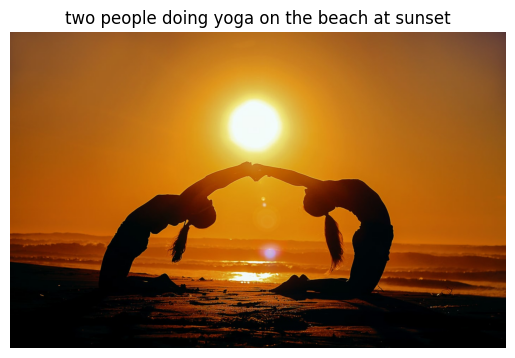

Caption: a swan and her baby swimming in the water


Caption: a yellow cactus flower with green leaves


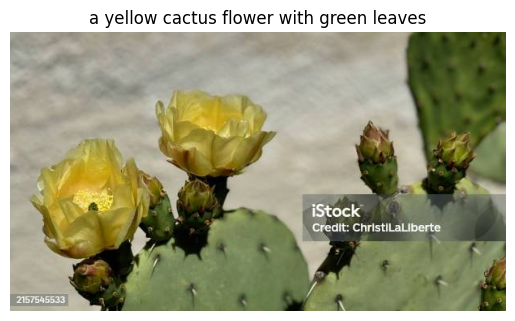

Caption: roses on a window sing


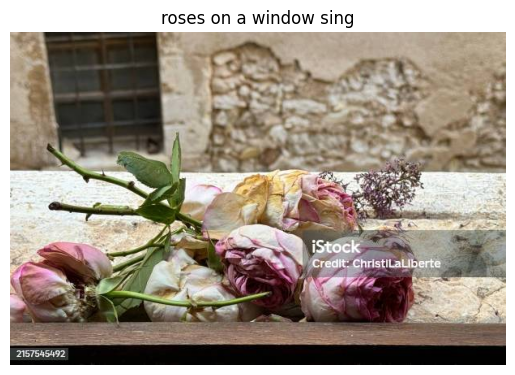

Caption: a black and white photo of a beach with a lighthouse


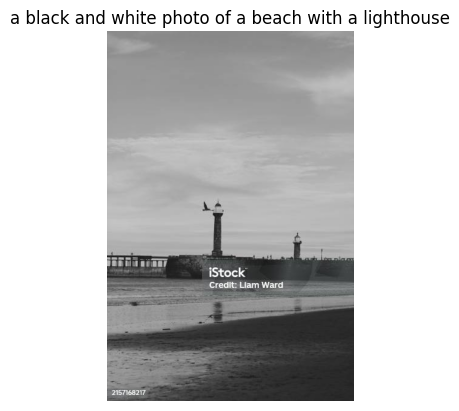

Caption: a woman and child sitting on the grass


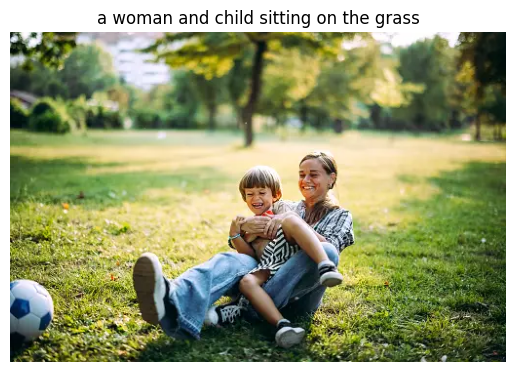

Caption: hands reaching up to the sky


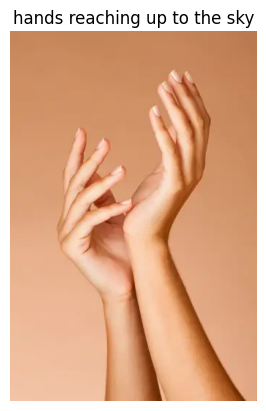

Caption: a blue eye with white and black background


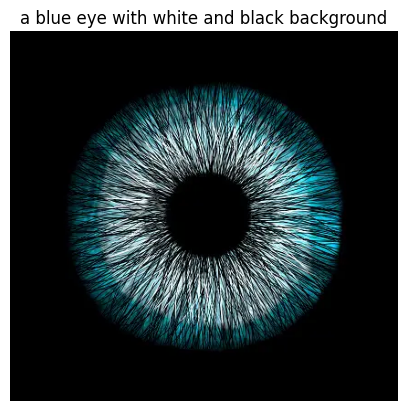

In [33]:
# printing images with their generated captions
for i, image in enumerate(images):
    print(f"Caption: {generated_captions[i]}")
    plt.imshow(np.asarray(image))
    plt.title(generated_captions[i])
    plt.axis('off')
    plt.show()

Enter your caption: walking by the sea beach
The most appropriate image for your caption is image 5: a person standing on a beach at sunset


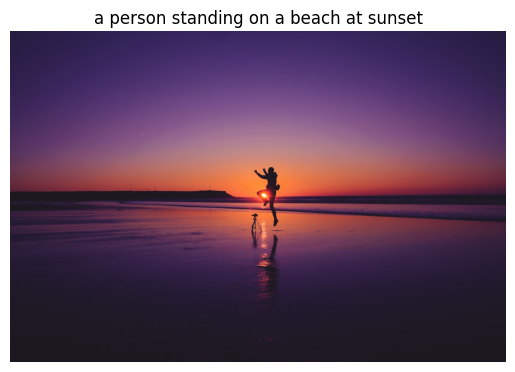

In [36]:
#input the written caption
provided_caption = input("Enter your caption: ")


clip_model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
clip_processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

# inputs for CLIP with the provided caption
clip_inputs = clip_processor(text=[provided_caption], images=images, return_tensors='pt', padding=True)


clip_outputs = clip_model(**clip_inputs)

# Get  the most likely image for the provided caption
best_image_index = clip_outputs.logits_per_text.argmax(dim=1).item()

# display the most appropriate image
print(f"The most appropriate image for your caption is image {best_image_index + 1}: {generated_captions[best_image_index]}")
plt.imshow(np.asarray(images[best_image_index]))
plt.title(generated_captions[best_image_index])
plt.axis('off')
plt.show()

**A try with sreamlit **

**STREAMLIT CODE that use search eng**

In [1]:
#setting up the streamlit enviroment:, pyngrok to create a tunnel for Streamlit
!pip install streamlit transformers torch pillow numpy scikit-learn
!pip install streamlit pyngrok


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [5]:
%%writefile app.py
import streamlit as st
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

#the layout of Streamlit
st.title('Text-to-Image Search with CLIP')
st.write('Enter a description to find the most relevant image.')

# Text input for search query
query_text = st.text_input("Enter  your search ")

# Button to perform search
if st.button('Search'):
    if not query_text:
        st.warning("Please enter a search query.")
    else:
        # Process text
        inputs = processor(text=captions, images=images, return_tensors='pt', padding=True)

        # Get model outputs
        with torch.no_grad():
            outputs = model(**inputs)

        # Find the most relevant image
        text_features = outputs.text_embeds
        image_features = outputs.image_embeds
        similarities = torch.matmul(text_features, image_features.T)
        best_match_index = similarities.argmax().item()

        # Display the best matching image
        best_image = images[best_match_index]
        st.image(best_image, caption=captions[best_match_index])
        st.write(f"Best match: {captions[best_match_index]}")

Overwriting app.py


In [7]:
from pyngrok import ngrok
import os


public_url = ngrok.connect(port='8501')
print('Streamlit app is live at:', public_url)

os.system('streamlit run app.py')


ERROR:pyngrok.process.ngrok:t=2024-08-01T16:52:49+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-08-01T16:52:49+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-08-01T16:52:49+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.